# Classification trees
This lab is a level up from previous sessions ! There is no code snippet for demonstration, as you should now be able to answer the different questions by reading the documentation.

## Classification trees

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\louka\OneDrive\Bureau\math comp 2\projet\ApprentissageSupervise\projetStatsChampsLol.csv")


C:\Users\louka\AppData\Local\Temp\ipykernel_14484\2112916264.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [56]:
qualitative_vars = ["Ranged","Class"]
target_vars = ["isTop","isJgl","isMid","isBot","isSup"]
quantitative_vars = [col for col in df.columns if col not in qualitative_vars + target_vars + ["Name"]]
print(qualitative_vars)
print(quantitative_vars)
print(target_vars)

X_quantitative=df[quantitative_vars]
X_qualitative=df[qualitative_vars]

X = pd.get_dummies(df, columns=['Class'],dtype=int)

columns_to_drop = ["isTop","isJgl","isMid","isBot","isSup","Name"]
X = X.drop(columns=columns_to_drop)

print(X)




['Ranged', 'Class']
['HP', 'HP+', 'HP5', 'HP5+', 'MP', 'MP+', 'MP5', 'MP5+', 'AD', 'AD+', 'AS', 'AS+', 'AR', 'AR+', 'MR', 'MR+', 'MS', 'Range']
['isTop', 'isJgl', 'isMid', 'isBot', 'isSup']
      HP    HP+   HP5  HP5+   MP   MP+    MP5  MP5+  AD   AD+  ...  \
0    650  114.0  3.00  1.00    0   0.0   0.00  0.00  60  5.00  ...   
1    590  104.0  2.50  0.60  418  25.0   8.00  0.80  53  3.00  ...   
2    570  119.0  9.00  0.90  200   0.0  50.00  0.00  62  3.30  ...   
3    630  107.0  3.75  0.65  350  40.0   8.20  0.70  52  3.00  ...   
4    685  120.0  8.50  0.85  350  40.0   8.50  0.80  62  3.75  ...   
..   ...    ...   ...   ...  ...   ...    ...   ...  ..   ...  ...   
166  630  110.0  3.25  0.70  250  45.0   6.00  0.80  56  2.00  ...   
167  606  106.0  6.50  0.60  480  23.5   8.00  0.80  55  3.10  ...   
168  574   96.0  5.50  0.50  452  50.0  11.35  0.80  52  3.00  ...   
169  630  106.0  7.50  0.60  425  25.0   8.00  0.65  58  3.30  ...   
170  574   93.0  5.50  0.50  418  25.0  

In [38]:
y=df["isTop"]

### Building a tree

**Questions**:
1. Build a decision tree on your previously processed dataset, using `DecisionTreeClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
2. What are the different available hyperparameters in sklearn for decision trees ?
3. Select optimum hyperparameters using a cross validation setting.
4. Return optimum parameters combination using cross validation and final accuracy (or recall or precision depending on your wanted target)
5. Explain how the attribute `feature_importances_` is computed.
6. Plot an elbow plot the most important features in your dataset and select the subset of most important features.
7. Run classification experiment and see if results are impacted.
8. **Bonus**: Use the features selected by the trees and test the two other classification method we tested: KNN and Naive Bayes.

In [57]:
#1.Build a decision tree on your previously processed dataset, using DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import classification_report

In [58]:
treee = tree.DecisionTreeClassifier()

print("======= Training")
treee.fit(X, y)

print("======= Prediction")
predictions = treee.predict(X)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        58

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [60]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

accuracy=[]

for train_index, test_index in kf.split(X.values):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Entraînement du modèle
    treee.fit(X_train, y_train)
    
    # Prédiction sur l'ensemble de test
    y_pred = treee.predict(X_test)
    
    # Calcul de la précision
    accuracy.append(accuracy_score(y_test, y_pred))

print("======")
print(f"Average accuracy scores {np.mean(accuracy)}")

Average accuracy scores 0.6428571428571428


criterion: It specifies the function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

max_depth: The maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

In [69]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['entropy','gini'], 
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'min_samples_split': [1,2,3,4,5,6,7],
    'min_samples_leaf': [1,2,3,4,5,6,7]
}

# Recherche des meilleurs hyperparamètres avec validation croisée
grid_search = GridSearchCV(estimator=treee, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Affichage des meilleurs hyperparamètres et du meilleur score
print("Meilleurs hyperparamètres trouvés:")
print(grid_search.best_params_)
print("Meilleur score sur la validation croisée:")
print(grid_search.best_score_)
#gini, 7, 1,2, 0.7890
#entropy , 7, 4, 3, 0.7773
#entropy, 2, 1,2, 0.7717
#gini, 8, 1, 3, 0.7831
#entropy, 2, 1, 2, 0.7717
# gini, 7, 1, 7, 0.
# entropy, 7, 3, 6, 0.7774

Meilleurs hyperparamètres trouvés:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 7}
Meilleur score sur la validation croisée:
0.777310924369748


C:\Users\louka\OneDrive\Bureau\math comp 2\Githup du cours\venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1400 fits failed out of a total of 9800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\louka\OneDrive\Bureau\math comp 2\Githup du cours\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\louka\OneDrive\Bureau\math comp 2\Githup du cours\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\louka\OneDrive\Bureau\math comp 2\Githup du co

Explain how the attribute feature_importances_ is computed.
- Gini impurity or Entropy decrease
- Weighted impurity decrease
- Normalization
Plot an elbow plot the most important features in your dataset and select the subset of most important features.
Run classification experiment and see if results are impacted.
Bonus: Use the features selected by the trees and test the two other classification method we tested: KNN and Naive Bayes.

In [70]:
from sklearn.model_selection import cross_val_score

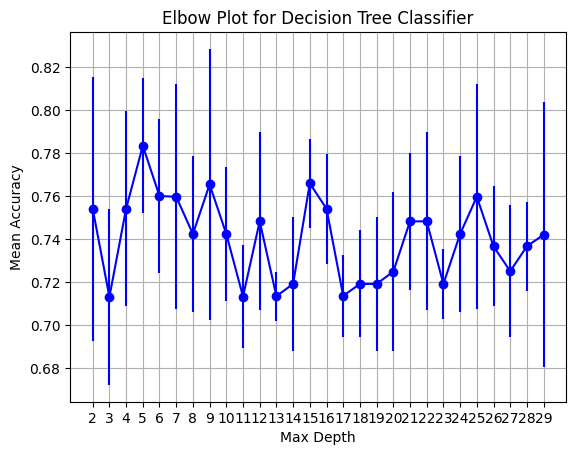

In [142]:
max_depth_values = np.arange(2, 30)

# Initialize lists to store mean accuracy scores and standard deviations
mean_scores = []
std_scores = []

# Evaluate the model for each max_depth value using 5-fold cross-validation
for max_depth in max_depth_values:
    model = tree.DecisionTreeClassifier(max_depth=max_depth, criterion='gini', min_samples_leaf=1, min_samples_split=2)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Plot the elbow plot
plt.errorbar(max_depth_values, mean_scores, yerr=std_scores, fmt='-o', color='b')
plt.title('Elbow Plot for Decision Tree Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()

### Representation

Trees can be represented using the `tree.plot_tree` function.

**Questions**:
1. Plot the previous tree.
2. Explain every single information provided by the tree.

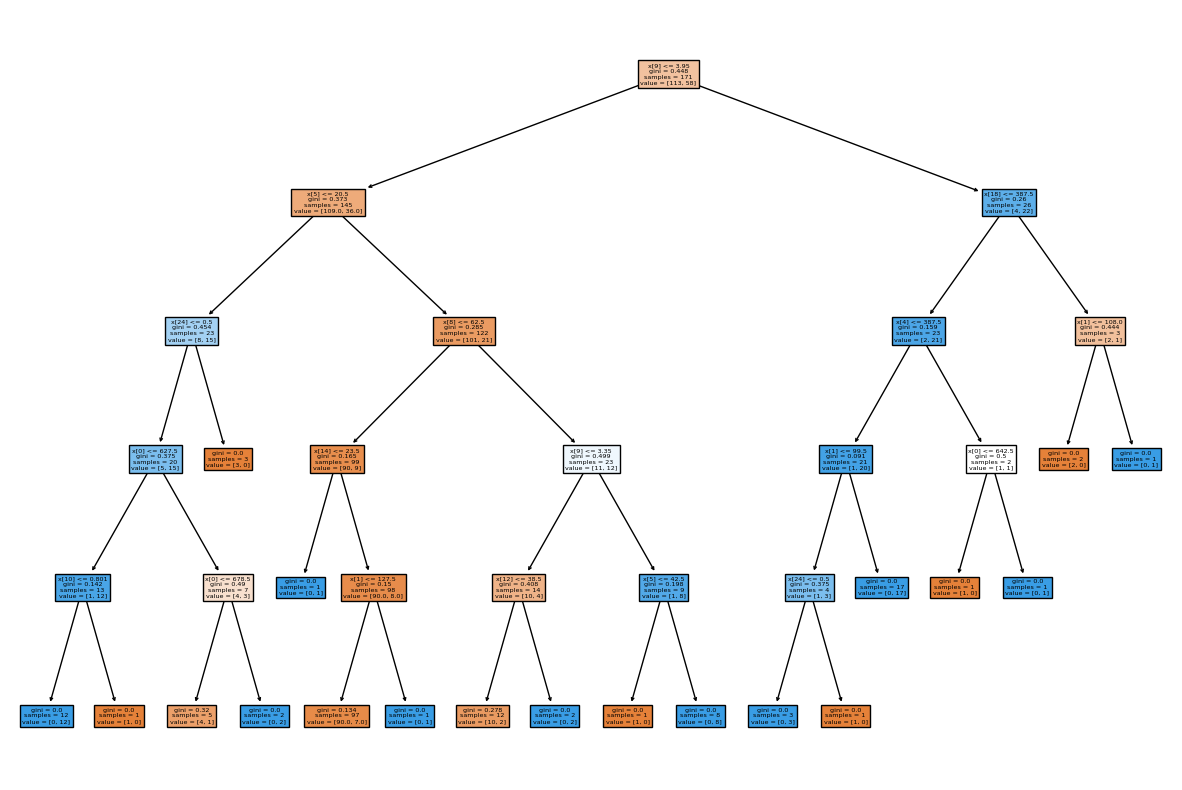

In [143]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

treee=tree.DecisionTreeClassifier(max_depth=5, criterion='gini', min_samples_leaf= 1, min_samples_split=2)
treee.fit(X, y)
plt.figure(figsize=(15, 10))  
plot_tree(treee, filled=True)
plt.show()

## Random forests
One of the major drawbacks of decision trees is their tendency to severely overfit on the data given as input. To improve this behavior, multiples trees are often built on randomly drawn subset of individuals and their contribution to the classification voted.

**Questions**:
1. Build a random forest using the class`RandomForestClassifier` https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.
2. Identify the hyperparameters and select the optimum combination using cross validation.
3. Train the random forest on the whole dataset and return the final score.
4. **Bonus**: compare the resilience to over fitting of trees and random forests by performing the following experiments: split the dataset into train and test, compare the results of the trees on train and test with the results of the random forest on the same dataset.

In [172]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=2)

accuracy=[]
rf_classifier = RandomForestClassifier(n_estimators=100,criterion='gini', min_samples_leaf= 1, max_depth=5,  min_samples_split=2) 

for train_index, test_index in kf.split(X.values):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Entraînement du modèle
    rf_classifier.fit(X_train, y_train)
    
    # Prédiction sur l'ensemble de test
    y_pred = rf_classifier.predict(X_test)
    
    # Calcul de la précision
    accuracy.append(accuracy_score(y_test, y_pred))

print("======")
print(f"Average accuracy scores {np.mean(accuracy)}")



Average accuracy scores 0.754172366621067


In [163]:
rf_classifier.fit(X,y)
y_pred = rf_classifier.predict(X)

print(accuracy_score(y, y_pred))

0.9473684210526315


In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print('forest :', accuracy_score(y_test, y_pred))

treee.fit(X_train, y_train)
y_pred = treee.predict(X_test)
print('tree :', accuracy_score(y_test, y_pred))

forest : 0.8857142857142857
tree : 0.7428571428571429
